In [19]:
library(tidyverse)
library(Seurat)
library(GSEABase)
library(GSVA)
library(pheatmap)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: annotate

Loading required pa

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [8]:
load("data_out/3.SCLC.tumor.no.S3.rdata")
ls()

[1] "cluster_counts" "col.names"      "exp_cluster"    "out_matrix"    
[5] "pc_count"       "sample_ID"      "SCLC.subset"    "SCLC.tumor"    
[9] "ss"

In [9]:
# check 
SCLC.tumor
table(SCLC.tumor$orig.ident)

An object of class Seurat 
33538 features across 11865 samples within 1 assay 
Active assay: RNA (33538 features, 3500 variable features)
 3 dimensional reductions calculated: pca, umap, harmony


  S1   S2   S4   S5   S6   S7 
1587 2601 2330   74 4896  377 

In [10]:
sample_ID<-unique(SCLC.tumor@meta.data[,1]);sample_ID
out_matrix=c()

[1] "S1" "S2" "S4" "S5" "S6" "S7"

In [11]:
for(ss in sample_ID)
{
subset(SCLC.tumor, orig.ident %in% ss)->SCLC.subset

pc_count=20
if(ss %in% c("S5","S7")){pc_count = 5}

print (pc_count)
SCLC.subset <- FindVariableFeatures(SCLC.subset, selection.method = "vst", nfeatures = 500)

SCLC.subset <- ScaleData(SCLC.subset, features = VariableFeatures(object = SCLC.subset))

SCLC.subset <- RunPCA(SCLC.subset, npcs = pc_count, verbose = FALSE, features = VariableFeatures(object = SCLC.subset),seed.use=42)

SCLC.subset <- RunUMAP(SCLC.subset, umap.method = 'umap-learn',reduction = "pca", dims = 1: pc_count, metric="correlation",seed.use=10)

SCLC.subset <- FindNeighbors(SCLC.subset,  reduction="harmony",dims = 1: pc_count)
SCLC.subset <- FindClusters(SCLC.subset,resolution = 0.2)
AverageExpression(SCLC.subset ,slot="data",assays="RNA" )[[1]]->exp_cluster
table(SCLC.subset@meta.data[,"seurat_clusters"])->cluster_counts
col.names<-paste(ss,colnames(exp_cluster), cluster_counts,sep="_")
colnames(exp_cluster)<-col.names
out_matrix=cbind(out_matrix, as.matrix(exp_cluster))
}

[1] 20


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1587
Number of edges: 54020

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9122
Number of communities: 5
Elapsed time: 0 seconds
[1] 20


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2601
Number of edges: 89438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8936
Number of communities: 5
Elapsed time: 0 seconds
[1] 20


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2330
Number of edges: 77967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8955
Number of communities: 4
Elapsed time: 0 seconds
[1] 5


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 74
Number of edges: 1496

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8470
Number of communities: 2
Elapsed time: 0 seconds
[1] 20


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4896
Number of edges: 169524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 7
Elapsed time: 0 seconds
[1] 5


Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 377
Number of edges: 10328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8687
Number of communities: 3
Elapsed time: 0 seconds


In [12]:
dim(out_matrix); head(out_matrix)

[1] 33538    26

,S1_0_648,S1_1_451,S1_2_375,S1_3_83,S1_4_30,S2_0_1162,S2_1_707,S2_2_355,S2_3_332,S2_4_45,⋯,S6_0_2263,S6_1_1485,S6_2_507,S6_3_298,S6_4_221,S6_5_88,S6_6_34,S7_0_157,S7_1_126,S7_2_94
MIR1302-2HG,0.000000000,0.000000000,0.000000000,0,0,0.000000000,0.000000000,0.0000000000,0.000000000,0,⋯,0.0000000000,0.000000000,0,0.00000000,0.00000000,0,0,0,0.00000000,0.000000000
FAM138A,0.000000000,0.000000000,0.000000000,0,0,0.000000000,0.000000000,0.0000000000,0.000000000,0,⋯,0.0000000000,0.000000000,0,0.00000000,0.00000000,0,0,0,0.00000000,0.000000000
OR4F5,0.000000000,0.000000000,0.000000000,0,0,0.000000000,0.000000000,0.0000000000,0.000000000,0,⋯,0.0000000000,0.000000000,0,0.00000000,0.00000000,0,0,0,0.00000000,0.000000000
AL627309.1,0.001413361,0.001437556,0.001606835,0,0,0.003595641,0.002998104,0.0003304311,0.003958839,0,⋯,0.0011152581,0.006139759,0,0.01046295,0.01854411,0,0,0,0.00399995,0.003166194
AL627309.3,0.000000000,0.000000000,0.000000000,0,0,0.000000000,0.000000000,0.0000000000,0.000000000,0,⋯,0.0004789706,0.000000000,0,0.00000000,0.00000000,0,0,0,0.00000000,0.004609529
AL627309.2,0.000000000,0.000000000,0.000000000,0,0,0.000000000,0.000000000,0.0000000000,0.000000000,0,⋯,0.0000000000,0.000000000,0,0.00000000,0.00000000,0,0,0,0.00000000,0.000000000


In [15]:
# write.csv(out_matrix,"table_out/3.4.out_matrix.csv",quote=F)

## ssGSEA

In [24]:
gmtFile <- "data_input/gmtfile/h.all.v7.2.symbols.gmt"
geneSet=getGmt(gmtFile, geneIdType=SymbolIdentifier())

In [ ]:
class(geneSet)
str(geneSet)

In [26]:
#ssgsea 
ssgseaScore=gsva(out_matrix, geneSet, method='ssgsea')

Warning message in .filterFeatures(expr, method):
“6067 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 50 gene sets.
  |======================================================================| 100%



In [43]:
# check ssgseaScore
dim(ssgseaScore); summary(ssgseaScore)
head(ssgseaScore)

[1] 50 26

    S1_0_648         S1_1_451         S1_2_375         S1_3_83      
 Min.   :0.1157   Min.   :0.1119   Min.   :0.1127   Min.   :0.1554  
 1st Qu.:0.4011   1st Qu.:0.3946   1st Qu.:0.3885   1st Qu.:0.5228  
 Median :0.5591   Median :0.5632   Median :0.5703   Median :0.6524  
 Mean   :0.5459   Mean   :0.5600   Mean   :0.5484   Mean   :0.6224  
 3rd Qu.:0.6986   3rd Qu.:0.7054   3rd Qu.:0.6985   3rd Qu.:0.7285  
 Max.   :1.0030   Max.   :1.0121   Max.   :0.9930   Max.   :0.9559  
    S1_4_30          S2_0_1162         S2_1_707         S2_2_355      
 Min.   :0.06824   Min.   :0.1050   Min.   :0.1376   Min.   :0.08901  
 1st Qu.:0.35621   1st Qu.:0.3776   1st Qu.:0.4222   1st Qu.:0.37435  
 Median :0.57787   Median :0.5389   Median :0.6042   Median :0.53772  
 Mean   :0.52283   Mean   :0.5389   Mean   :0.5832   Mean   :0.54395  
 3rd Qu.:0.65269   3rd Qu.:0.6970   3rd Qu.:0.7206   3rd Qu.:0.69944  
 Max.   :0.91317   Max.   :1.0213   Max.   :1.0023   Max.   :1.02202  
    S2_3_332        

,S1_0_648,S1_1_451,S1_2_375,S1_3_83,S1_4_30,S2_0_1162,S2_1_707,S2_2_355,S2_3_332,S2_4_45,⋯,S6_0_2263,S6_1_1485,S6_2_507,S6_3_298,S6_4_221,S6_5_88,S6_6_34,S7_0_157,S7_1_126,S7_2_94
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.4915930,0.5176665,0.5291071,0.7525236,0.5610527,0.5188569,0.6285693,0.5131315,0.5220536,0.6210716,⋯,0.4662017,0.4433894,0.4393342,0.5414826,0.4487135,0.5740830,0.5746628,0.5265379,0.5912482,0.5203235
HALLMARK_HYPOXIA,0.5926169,0.6144332,0.6451702,0.6642551,0.5151595,0.5792320,0.7012620,0.5736047,0.5779538,0.6110158,⋯,0.5662805,0.5580648,0.5573398,0.6319276,0.5401890,0.5618554,0.6130360,0.6139616,0.6382816,0.6121870
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.6877923,0.6978794,0.6923032,0.7021609,0.6551999,0.6607528,0.6847634,0.6525740,0.6552292,0.6583118,⋯,0.6859751,0.6710024,0.6346752,0.6781493,0.6216831,0.6488231,0.6877783,0.7432763,0.7306203,0.7368340
HALLMARK_MITOTIC_SPINDLE,0.7206932,0.8038451,0.7333698,0.6809172,0.6259379,0.7067202,0.7237848,0.7895852,0.7783740,0.7468769,⋯,0.7762208,0.8226687,0.7878256,0.7820583,0.8280219,0.8042199,0.7298415,0.6876710,0.7277616,0.7968960
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.4931242,0.5098990,0.5047544,0.6457937,0.4981392,0.4811870,0.5259676,0.4739253,0.4586439,0.4817147,⋯,0.4889706,0.4865152,0.4895323,0.5381023,0.4734558,0.4661244,0.5693380,0.5147632,0.5125182,0.4975873
HALLMARK_TGF_BETA_SIGNALING,0.6978237,0.6971715,0.6684291,0.8474215,0.6793256,0.7194531,0.7724886,0.7285514,0.7112880,0.7301280,⋯,0.6938088,0.7069341,0.7027513,0.7062884,0.6854442,0.7326675,0.7518320,0.6734499,0.7117557,0.6871964


In [44]:
# save 
# write.csv(ssgseaScore, file = "table_out/3.4.ssgseaScore.csv",quote = F)

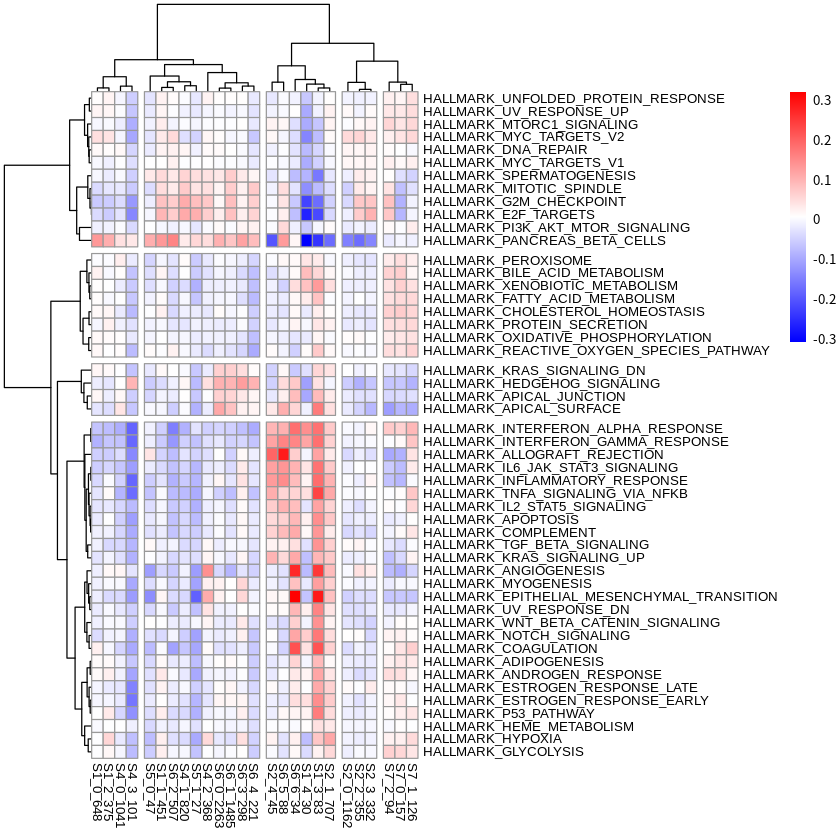

In [57]:
ssgseaScore-rowMeans(ssgseaScore)->ssgseaOut 

## plot heatmap
pheatmap(ssgseaOut,clustering_method="ward.D2",clustering_distance_cols="correlation", 
         clustering_distance_rows="correlation",
         # breaks=seq(-5,5,10/500),
         # scale = "row",
         colorRampPalette(c("blue","white","red"))(500),cutree_cols=5,cutree_rows=4,fontsize=8)

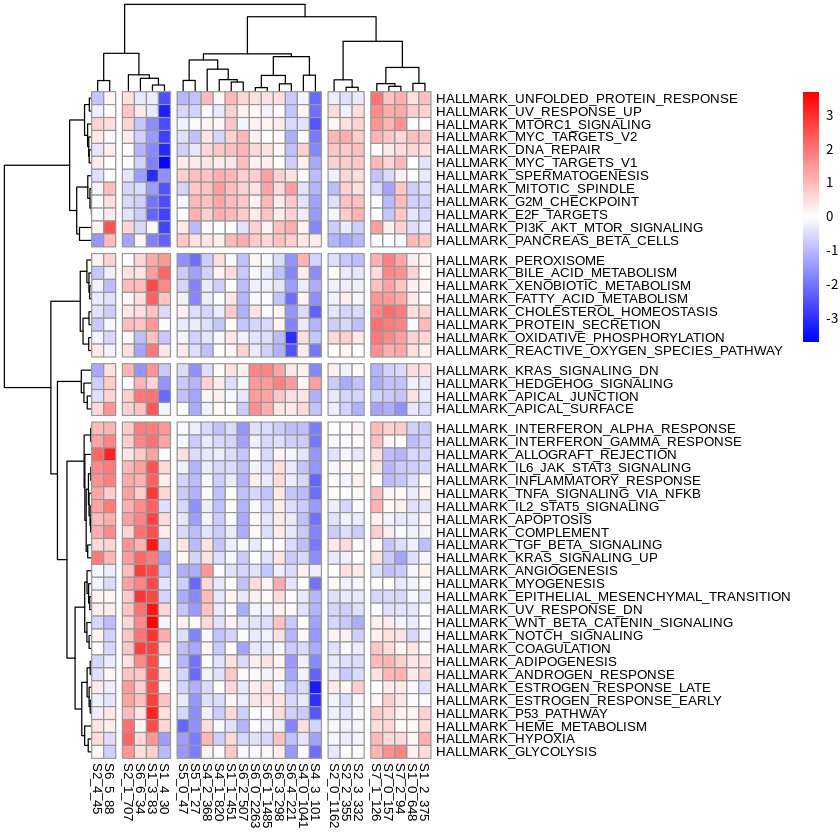

In [58]:
ssgseaScore ->ssgseaOut 

## plot heatmap
pheatmap(ssgseaOut,clustering_method="ward.D2",clustering_distance_cols="correlation", 
         clustering_distance_rows="correlation",
         # breaks=seq(-5,5,10/500),
          scale = "row",
         colorRampPalette(c("blue","white","red"))(500),cutree_cols=5,cutree_rows=4,fontsize=8)

In [59]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12      GSVA_1.42.0          GSEABase_1.56.0     
 [4] graph_1.72.0         annotate_1.72.0      XML_3.99-0.8        
 [7] AnnotationDbi_1.56.2 IRanges_2.28.0       S4Vectors_0.32.3    
[10] Biobase_2.54.0       BiocGenerics_0.40.0  SeuratObject_4.0.4  
[13] Seurat_4.0.